# Assignment 1: Social Data Analysis and Visualization 02806

**Notes about text formatting**: *italic* for instructors' questions, normal text for answers. `geoplotlib` outputs (KDE maps and dot maps) have been uploaded to Tinypic and an external link has been used to include the pictures. That's why the `geoplotlib.inline()` statement is commented wherever it appears.

Let's organize all the imports in one cell:

In [1]:
import pandas as pd
import numpy as np
import random as rn
from collections import Counter
from matplotlib import pyplot as plt
from scipy import stats
import urllib2
import re
import math
from prettytable import PrettyTable
import mpld3
%matplotlib inline
import pandas as pd
import operator
from bokeh.plotting import figure, output_notebook, show
from bokeh.charts import Bar, output_file, show
import seaborn as sns
import geoplotlib
from geoplotlib.utils import BoundingBox
from geoplotlib.colors import ColorMap
from sklearn.neighbors import KNeighborsClassifier
from geoplotlib.layers import BaseLayer
from geoplotlib.core import BatchPainter
from geoplotlib.colors import create_set_cmap
import pyglet
from sklearn import linear_model
import itertools
from scipy.stats.stats import pearsonr
import datetime
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
pd.options.mode.chained_assignment = None  # default='warn
from prettytable import PrettyTable

## Assignment 1A: Anscombe's quartet

> *Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data4.tsv). The format is `.tsv`, which stands for tab separated values. Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.*

In [2]:
data_urls = ["https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data1.tsv",
             "https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data2.tsv",
             "https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data3.tsv",
             "https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data4.tsv"]
data_files = [urllib2.urlopen(url).read() for url in data_urls]

#Cleaning and converting from string to arrays using Regex
datasets = []
for d in data_files:
    lines = re.split(r'\n',d)
    x = [float(re.split(r'\t',line)[0]) for line in lines]
    y = [float(re.split(r'\t',line)[1]) for line in lines]
    datasets.append((x,y))

Pretty printing the datasets (`datasets` is a list of *tuples*, where each tuple contains 2 lists, the x and y values):

In [3]:
for num,d in enumerate(datasets):
    x = PrettyTable(field_names=['x','y'])
    for i in range(len(d[0])):
        x.add_row([d[0][i],d[1][i]])
    print "Dataset No.",num+1
    print x,'\n'

Dataset No. 1
+------+-------+
|  x   |   y   |
+------+-------+
| 10.0 |  8.04 |
| 8.0  |  6.95 |
| 13.0 |  7.58 |
| 9.0  |  8.81 |
| 11.0 |  8.33 |
| 14.0 |  9.96 |
| 6.0  |  7.24 |
| 4.0  |  4.26 |
| 12.0 | 10.84 |
| 7.0  |  4.82 |
| 5.0  |  5.68 |
+------+-------+ 

Dataset No. 2
+------+------+
|  x   |  y   |
+------+------+
| 10.0 | 9.14 |
| 8.0  | 8.14 |
| 13.0 | 8.74 |
| 9.0  | 8.77 |
| 11.0 | 9.26 |
| 14.0 | 8.1  |
| 6.0  | 6.13 |
| 4.0  | 3.1  |
| 12.0 | 9.13 |
| 7.0  | 7.26 |
| 5.0  | 4.74 |
+------+------+ 

Dataset No. 3
+------+-------+
|  x   |   y   |
+------+-------+
| 10.0 |  7.46 |
| 8.0  |  6.77 |
| 13.0 | 12.74 |
| 9.0  |  7.11 |
| 11.0 |  7.81 |
| 14.0 |  8.84 |
| 6.0  |  6.08 |
| 4.0  |  5.39 |
| 12.0 |  8.15 |
| 7.0  |  6.42 |
| 5.0  |  5.73 |
+------+-------+ 

Dataset No. 4
+------+------+
|  x   |  y   |
+------+------+
| 8.0  | 6.58 |
| 8.0  | 5.76 |
| 8.0  | 7.71 |
| 8.0  | 8.84 |
| 8.0  | 8.47 |
| 8.0  | 7.04 |
| 8.0  | 5.25 |
| 19.0 | 12.5 |
| 8.0  | 5.5

* *Using the numpy function mean, calculate the mean of both x-values and y-values for each dataset. Use python string formatting to print precisely two decimal places of these results to the output cell.* 

In [4]:
for i,data in enumerate(datasets):
    print "Mean in dataset %d -> x-values: %.2f, y-values: %.2f" %(i+1,np.mean(data[0]),np.mean(data[1]))

Mean in dataset 1 -> x-values: 9.00, y-values: 7.50
Mean in dataset 2 -> x-values: 9.00, y-values: 7.50
Mean in dataset 3 -> x-values: 9.00, y-values: 7.50
Mean in dataset 4 -> x-values: 9.00, y-values: 7.50


* *Now calculate the variance for all of the various sets of x- and y-values (to three decimal places).*

In [5]:
for i,data in enumerate(datasets):
    print "Variance in dataset %d -> x-values: %.3f, y-values: %.3f" %(i+1,np.var(data[0]),np.var(data[1]))

Variance in dataset 1 -> x-values: 10.000, y-values: 3.752
Variance in dataset 2 -> x-values: 10.000, y-values: 3.752
Variance in dataset 3 -> x-values: 10.000, y-values: 3.748
Variance in dataset 4 -> x-values: 10.000, y-values: 3.748


* *Use numpy to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).*

Pearson's correlation coefficient when applied to a population is commonly represented by the Greek letter $ρ$ (rho) and may be referred to as the population correlation coefficient or the population Pearson correlation coefficient.

In [6]:
def de_mean(x):
    x_bar = np.mean(x)
    return [x_i - x_bar for x_i in x]

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)

#According to Wikipedia's formula:
def pearson_correlation(x,y):
    return covariance(x,y)/(np.std(x)*np.std(y))

for i,d in enumerate(datasets):
    print "Pearson correlation of dataset %d: %.3f" %(i+1,pearson_correlation(d[0],d[1]))

Pearson correlation of dataset 1: 0.898
Pearson correlation of dataset 2: 0.898
Pearson correlation of dataset 3: 0.898
Pearson correlation of dataset 4: 0.898


* *The next step is use linear regression to fit a straight line $f(x)=ax+b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using scipy's linregress. It works like this:*

`from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)`

* *Finally, it's time to plot the four datasets using matplotlib.pyplot. Use a two-by-two subplot to put all of the plots nicely in a grid and use the same x and y range for all four plots. And include the linear fit in all four plots.*

We hereby calculate the linear regression for each dataset and plot them:

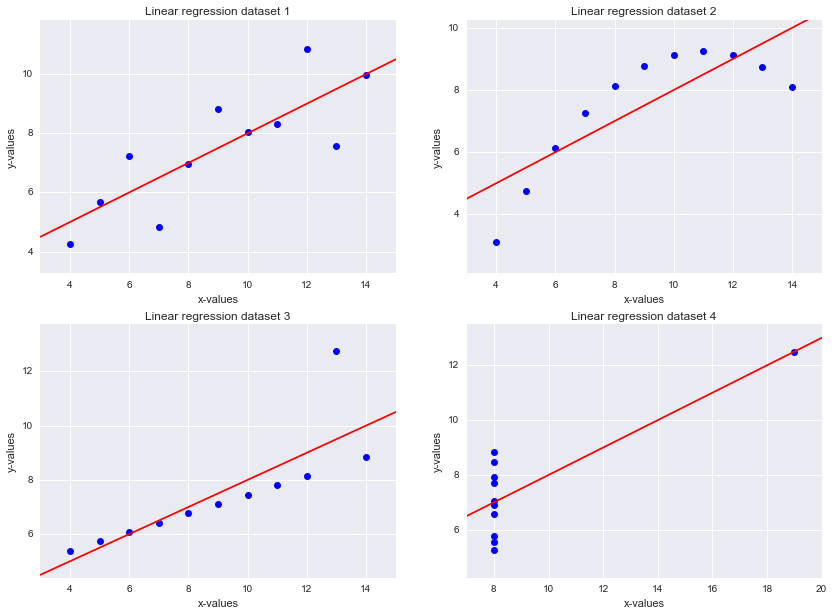

In [7]:
#I plot both the points and the linear regression
plt.figure(figsize=(14,10))
for i,d in enumerate(datasets): 
    slope, intercept, r_value, p_value, std_err = stats.linregress(d[0],d[1])
    plt.subplot(2,2,i+1)
    plt.plot(d[0],d[1],'bo')
    plt.xlabel("x-values")
    plt.ylabel("y-values")
    plt.title("Linear regression dataset %d" %(i+1))
    plt.xticks(np.arange(0,max(d[0])+2,2))
    plt.yticks(np.arange(2,max(d[1])+2,2))
    plt.xlim([min(d[0])-1,max(d[0])+1])
    plt.ylim([min(d[1])-1,max(d[1])+1])
    x = np.linspace(min(d[0])-1,max(d[0])+1)
    y = slope*x+intercept #linear fit
    plt.plot(x,y,'r-')
plt.show()

* *Explain - in your own words - what you think my point with this exercise is.*

With basic descriptive statistics we didn't see great differences between the datasets (all of them returned same values for mean, variance and correlation). However, by plotting the datasets we find out that the datasets are all different and each of them has something that could be pointed out.

* The first scatter plot (top left) appears to be a simple linear relationship, corresponding to two variables correlated and following the assumption of normality.
* The second graph (top right) is not distributed normally; while a relationship between the two variables is obvious, it is not linear, and the Pearson correlation coefficient is not relevant. A more general regression and the corresponding coefficient of determination would be more appropriate.
* In the third graph (bottom left), the distribution is linear, but should have a different regression line. The calculated regression is offset by the one outlier.
* Finally, the fourth graph (bottom right) shows an example when one outlier is enough to produce a high correlation coefficient, even though the other data points do not indicate any relationship between the variables.

All in all, the point of the exercise is to say that basic descriptive statistics is not enough to have an overview of the datasets and their main features, but a more in depth analysis is always required.

## Assignment 1B: KNN
> *The goal of this exercise is to create a useful real-world version of the example on pp153 in DSFS. We know from Week 3's exercises that the focus crimes PROSTITUTION, DRUG/NARCOTIC and DRIVING UNDER THE INFLUENCE tend to be concentrated in certain neighborhoods, so we focus on those crime types since they will make the most sense a KNN - map.*

We start by loading the data and using a Pandas DataFrame to handle it in the most convenient way:

In [8]:
# Load it into a Dataframe using pandas
path = '..\data\sfpd_incidents.csv'
df = pd.read_csv(path)
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


We create a subset of the original DataFrame, with only the relevant information:

In [9]:
#Create a subset of the main dataframe with only the KNN crimes
knn_crimes = ['PROSTITUTION', 'DRUG/NARCOTIC', 'DRIVING UNDER THE INFLUENCE']
knn_data = df[df['Category'].isin(knn_crimes)]
knn_data = knn_data.filter(items=['Category','X','Y'])
knn_data.head()

,Category,X,Y
11,DRUG/NARCOTIC,-122.413354,37.769075
12,DRUG/NARCOTIC,-122.413354,37.769075
31,DRUG/NARCOTIC,-122.419520,37.764229
41,DRUG/NARCOTIC,-122.419828,37.766674
61,DRIVING UNDER THE INFLUENCE,-122.420692,37.790577


* *Begin by using geoplotlib to plot all incidents of the three crime types on their own map using `geoplotlib.kde()`. This will give you an idea of how the various crimes are distributed across the city.*

Since we noticed there are some outliers in the data, probably due to measurement errors, we filter them out while taking the values of longitude/latitude. The below KDE maps show the areas where each crime is mostly concentrated (even if not so evident, very bright area means high density).

In [10]:
def kde_plot(geo_data):
    #Ready for plotting
    #print(crime+': KDE Map')
    geoplotlib.kde(geo_data,bw=3,binsize=0.5,cmap='jet') #hot
    bbox = BoundingBox(north=max(geo_data['lat']), #geo_data_for_plotting['lat']
                       west=min(geo_data['lon']), #geo_data_for_plotting['lon']
                       south=min(geo_data['lat']), #geo_data_for_plotting['lat']
                       east=max(geo_data['lon'])) #geo_data_for_plotting['lon']
    geoplotlib.set_bbox(bbox)
    #geoplotlib.inline()
    
# Remove the outliers
knn_data = knn_data[knn_data['Y']!=90]

# Create a dictionary and put each crime's coordinates as a separate key,value pair and plot the KDE
geo_dict = {}
for crime in knn_crimes:
    geo_data_for_plotting = {"lat": [float(el) for el in list(knn_data[knn_data['Category']==crime]['Y'])],
                             "lon": [float(el) for el in list(knn_data[knn_data['Category']==crime]['X'])]}
    geo_dict[crime] = geo_data_for_plotting
    kde_plot(geo_dict[crime])

![alt text](http://i67.tinypic.com/fasi0i.png "PROSTITUTION KDE Map")
![alt text](http://i68.tinypic.com/2dilr3t.png "DRUG/NARCOTIC: KDE Map")
![alt text](http://i68.tinypic.com/14ieko4.png "DRIVING UNDER THE INFLUENCE: KDE Map")

* *Next, it's time to set up your model based on the actual data.*
    * *You don't have to think a lot about testing/trainig and accuracy for this exercise. We're mostly interested in creating a map that's not too problematic. But do calculate the number of observations of each crime-type respectively. You'll find that the levels of each crime varies (lots of drug arrests, an intermediate amount of prostitiution registered, and very little drunk driving in the dataset). Since the algorithm classifies each point according to it's neighbors, what could a consequence of this imbalance in the number of examples from each class mean for your map?*
    * *You can make the dataset 'balanced' by grabbing an equal number of examples from each crime category. How do you expect that will change the KNN result? In which situations is the balanced map useful - and when is the map that data in proportion to occurrences useful? Choose which map you will work on in the following.*

We decided to show also in an alternative way, using the `.dot()` function, the above KDE maps: below you can see the plot.
We'll be using the **KNeighborsClassifier** provided by scikit-learn as the model to fit with our data.

As we can see on the map below, most of the dots are green meaning that there are more **DRUG** related crimes. Red comes second, which is related to **PROSTITUTION**, and lastly **DRIVING OVER THE INFLUENCE** is the crime with the fewer observations among the others. This inbalance will cause the classifier not to be fair/biased between the neighbors. For example, if we think of a specific observation, it will be more likely to have DRUG related neighbors than DRIVING OVER THE INFLUENCE.

We will be working with the balanced map since it's more suitable for a KNN analysis. By modifying the number of occurencies of each category to a balanced number for all of them, we can fit an unbiased classifier.

In [11]:
#Let's define a function for plotting the dot map, as it will be used later
def dot_plot(geo_dict):
    colors = ['red', 'green', 'blue']

    for i,crime in enumerate(knn_crimes):
        # Create a legend
        print '%s\t ----->\t%d observations\t ----->\t%s' % (colors[i],len(geo_dict[crime]['lon']),crime)
        # Fit the map with dots
        geoplotlib.dot(geo_dict[crime], color=colors[i], point_size=2)

    # Create an BoundigBox for the limits of the map
    bbox = BoundingBox(north=max(geo_dict[crime]['lat']),
                       west=min(geo_dict[crime]['lon']),
                       south=min(geo_dict[crime]['lat']),
                       east=max(geo_dict[crime]['lon']))
    geoplotlib.set_bbox(bbox)
    #geoplotlib.inline()
    
dot_plot(geo_dict)

red	 ----->	16161 observations	 ----->	PROSTITUTION
green	 ----->	115124 observations	 ----->	DRUG/NARCOTIC
blue	 ----->	5302 observations	 ----->	DRIVING UNDER THE INFLUENCE


![alt text](http://i64.tinypic.com/33wxs9s.jpg "SF Crimes Dot Map (Unbalanced)")

It's clear that even if the **PROSTITUTION** crimes are more than the **DRIVING UNDER THE INFLUENCE** ones, the fact that the latters are more scattered almost completely hides the formers. We can barely see red dots in the plot, because most of them are located very close to each other, as the KDE maps previously plotted show.

According to the above, the classifier will more likely fit those dots with high density together with those dots with lower density. Below we get a balanced dataset by taking an equal number of random samples for each category:

In [12]:
num_samples = 3000 #Number of random samples to extract

# Randomly extract a balanced number of samples
balanced_df = pd.DataFrame(columns = ['Category','X','Y'])
for crime in knn_crimes:
    sample = knn_data[knn_data['Category']==crime].sample(n=num_samples)
    balanced_df = pd.concat([sample,balanced_df])

In order to have an overview of how the balanced dataset distributes in the map, we plot a sampled version of a scatter plot:

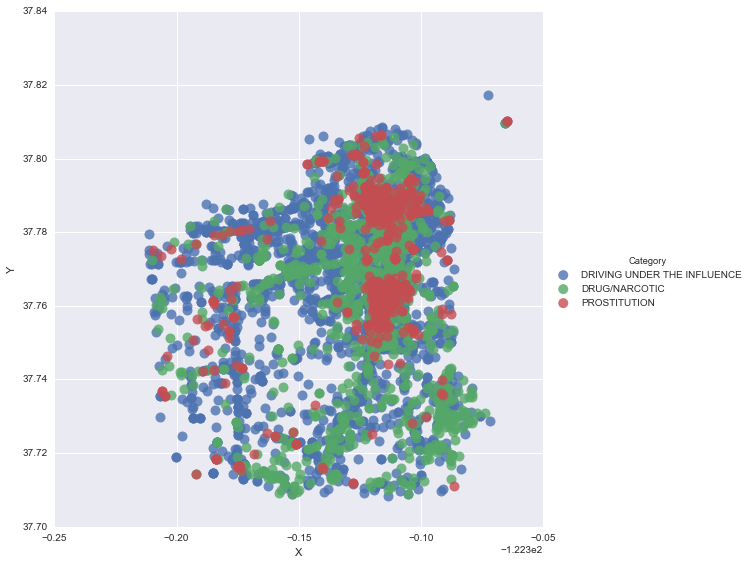

In [13]:
# Create a simple plot of the dataset before the classification
sns.lmplot('X', 'Y', data=balanced_df, fit_reg=False,hue="Category", size=8,scatter_kws={"marker": "D","s": 100})

Here's our version of the dot map using the balanced dataset:

In [14]:
# Create a dictionary and put each crime's coordinates as a seperate key,value pair
geo_dict_balanced = {}
for crime in knn_crimes:
    geo_data_for_plotting = {"lat": [float(el) for el in list(balanced_df[balanced_df['Category']==crime]['Y'])],
                             "lon": [float(el) for el in list(balanced_df[balanced_df['Category']==crime]['X'])]}
    geo_dict_balanced[crime] = geo_data_for_plotting

dot_plot(geo_dict_balanced)

red	 ----->	3000 observations	 ----->	PROSTITUTION
green	 ----->	3000 observations	 ----->	DRUG/NARCOTIC
blue	 ----->	3000 observations	 ----->	DRIVING UNDER THE INFLUENCE


![alt text](http://i64.tinypic.com/28tw5cw.png "SF Crimes Dot Map (Balanced)")

* *Now create an approximately square grid of point that runs over SF. You get to decide the grid-size, but I recommend somewhere between $50 \times 50$ and $100 \times 100$ points. I recommend plotting using `geoplotlib.dot()`. To plot in three distinct colors, I simply ran the command three times, once for each color.*

In order to create the grid, we need all the coordinates contained within the min/max latitudes/longitudes. We chose the grid size of $100\times100$.

We save in a convenient way all the points of the grid (if the grid size is $100\times100$, there will be 10000 points) in a dictionary, separating latitudes and longitudes but keeping the same order.

In [15]:
grid_size = 100

#Generating all the coordinates of the points contained in the grid
min_lat = min(knn_data['Y'])
max_lat = max(knn_data['Y'])
min_lon = min(knn_data['X'])
max_lon = max(knn_data['X'])
all_lats = np.arange(min_lat,max_lat,(max_lat-min_lat)/grid_size)
all_longs = np.arange(min_lon,max_lon,(max_lon-min_lon)/grid_size)

#List of tuples representing points, generated combining all possible values of latitudes/longitudes
all_points = set() #Created as set, to be sure it won't contain duplicates
for lat in all_lats:
    for lon in all_longs:
        all_points.add((lat,lon)) #each coordinate saved as a tuple
all_points = list(all_points)

all_grid_points = {'lat': [el[0] for el in all_points],
                   'lon':[el[1] for el in all_points]}

Below we plotted just an overview of what does the grid look like (*before* the classification, only raw coordinate points, to make sure it was as expected):

In [16]:
geoplotlib.dot(all_grid_points, color='black', point_size=2)

# Create an BoundigBox for the limits of the map
bbox = BoundingBox(north=max(all_grid_points['lat']),
                   west=min(all_grid_points['lon']),
                   south=min(all_grid_points['lat']),
                   east=max(all_grid_points['lon']))
geoplotlib.set_bbox(bbox)
#geoplotlib.inline()

![alt text](http://i65.tinypic.com/2zzt3c9.png "Grid 100x100")

* *Visualize your model by coloring the grid, coloring each grid point according to its category. Create a plot of this kind for models where each point is colored according to the majority of its 5, 10, and 30 nearest neighbors. Describe what happens to the map as you increase the number of neighbors, K.*

As it's shown below, we used Object Oriented Programming for Python to create a [`Layer` class](https://github.com/andrea-cuttone/geoplotlib/wiki/User-Guide#defining-custom-layers), whose concern is to display the title on each plot and plot complex data. We fit the KNN classifier inside the `invalidate()` method and according to the output provided by the prediction we draw each point of the grid with the correct color.

For each number of neighbors we plot the colored grid, in order to see what does this parameter affect concerning the model.

In [17]:
class KNeighbors_Layer(BaseLayer):

    def __init__(self, data,k,all_grid_points):
        self.data = data #Is the balanced dataframe
        self.k = k # number of neighbors
        self.all_grid_points = all_grid_points #All the coordinate of the grid points

    def invalidate(self, proj):
        self.painter = BatchPainter() # initilizes the painter
        
        # Train the KNN classifier
        features = np.array(self.data[['Y','X']]) # Notice that X,Y are reverted by default in the original data frame
        labels = np.array(self.data['Category'])
        clf = KNeighborsClassifier(n_neighbors=self.k)
        clf.fit(features, labels)
        
        #Prepare the grid points to predict, building matrix
        x, y = proj.lonlat_to_screen(self.all_grid_points['lon'], self.all_grid_points['lat'])
        #Used column stack to concatenate by columns the two arrays and create a 2D array
        grid_points_matrix = np.column_stack((self.all_grid_points['lat'],self.all_grid_points['lon']))
        Z = clf.predict(grid_points_matrix)

        # Create colormap per crime
        self.cmap = {'PROSTITUTION':'red','DRUG/NARCOTIC':'green','DRIVING UNDER THE INFLUENCE':'blue'}
        for crime in knn_crimes:
            self.painter.set_color(self.cmap[crime])
            self.painter.points(x[Z == crime], y[Z == crime], 4) # paints the points according to predicted crimes
    
    # Map interaction
    def draw(self, proj, mouse_x, mouse_y, ui_manager):
        ui_manager.info('Number of neighbors : %d' % self.k)
        self.painter.batch_draw()

After the definition of the class, we finally plot the different dot maps, each one using a different number of neighbors for the classifier.

In [18]:
num_neighbors=[5,10,30]

for k in num_neighbors:
    geoplotlib.add_layer(KNeighbors_Layer(balanced_df,k,pd.DataFrame(all_grid_points)))
    geoplotlib.set_smoothing(True)
    bbox = BoundingBox(north=max(all_grid_points['lat']),
                       west=min(all_grid_points['lon']),
                       south=min(all_grid_points['lat']),
                       east=max(all_grid_points['lon']))
    geoplotlib.set_bbox(bbox)
    #geoplotlib.inline()

![alt text](http://i67.tinypic.com/k1udfb.png "KNN 5")
![alt text](http://i63.tinypic.com/2jeaijb.png "KNN 10")
![alt text](http://i65.tinypic.com/2ed1huf.png "KNN 30")

As it's clear from the above dot maps, the **DRIVING UNDER THE INFLUENCE** crimes capture most of the points, since originally those crimes are scattered all over San Francisco, with high density in pretty much all neighborhoods. In general, we notice that increasing the number of neighbors gives a worse performance, since it tends to capture a wider area, loosing accuracy.

# Assignment 1C: Linear Regression
*Start by picking an area and a crime type, I recommend starting with all of SF and LARCENY/THEFT so you don't have too many zero counts. Similarly, I recommend using 2015 data for training (big feel free grab everything if you feel a need for big data in your life).*

*We will only make predictions for the interval 5am-5pm where the crime count for LARCENY/THEFT is more or less linearly increasing.*

*We start by creating a scatterplot.*

* *Put time-of-day (in the range 05:00-17:00) on the $x$-axis.*
* *Next you go over the training data and bin and observed number of LARCENY/THEFT crimes per hour. You should have 12 data-points per day of training data.*
* *Plot the (time-of-day, bin-count) tuples. Does it look like there is a correlation?*
* *Report the Pearson-correlation.*
* *Now we can fit a straight line to the data, add the straight line to your scatterplot *

*In our example, each observation (the $(x_i, y_i)$ pair) is found by going over the dataset, day by day, and for each hour registering time-of-day ($x_i$) and number of LARCENY/THEFT crimes in that hour ($y_i$). As mentioned above, this means that you should extract $12\times 365 = 4\,380$ datapoints from the 2015 data when you prepare the data to fit the model.*

*So your task is to finally:*
* *Fit this model to the data (and report $\alpha, \beta$).*
* *Add the straight line to your scatterplot*

We decided to solve this exercise as a whole block in order to feel free to make our own calculation and mantain a high degree of readability.

In [19]:
# Check number of occurences of a specific crime per district
df[df['Category']=='LARCENY/THEFT'].groupby(df['PdDistrict'])['PdDistrict'].count()

PdDistrict
BAYVIEW        24262
CENTRAL        61828
INGLESIDE      23339
MISSION        42020
NORTHERN       70431
PARK           22601
RICHMOND       25047
SOUTHERN      101246
TARAVAL        28498
TENDERLOIN     22897
Name: PdDistrict, dtype: int64

So from the above projection we decided that we will focus on **LARCENY/THEFT** category in all SF area which includes plenty of observations and we will try to fit all this as training data into the following classifier. We also restricted to the **2016** crimes.

In [20]:
year = 2016
num_days_per_year = 366

In [21]:
#Extract year from date
def getYear(date):
    return int(date.split('/')[2])

# Let's filter the LARCENY/THEFT crimes of 2016
df['Year'] = df['Date'].apply(lambda x: getYear(x))
df_superfocused = df[(df['Category']=='LARCENY/THEFT')&(df['Year']==year)]
df_superfocused.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year
11377,160000578,LARCENY/THEFT,PETTY THEFT FROM UNLOCKED AUTO,Friday,01/01/2016,02:14,NORTHERN,NONE,BUCHANAN ST / NORTHPOINT ST,-122.433527,37.804033,"(37.8040331807562, -122.43352736442)",16000057806222,2016
188315,160002988,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,01/01/2016,18:30,SOUTHERN,NONE,HOWARD ST / 5TH ST,-122.404934,37.781499,"(37.7814987213218, -122.404934413339)",16000298806244,2016
215938,140564908,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Thursday,07/07/2016,20:30,TARAVAL,NONE,1800 Block of OCEAN AV,-122.461683,37.725190,"(37.7251897236748, -122.461683159559)",14056490806244,2016
215939,160002063,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,01/01/2016,16:00,CENTRAL,NONE,JONES ST / GREEN ST,-122.415574,37.798681,"(37.7986812884373, -122.415573641104)",16000206306244,2016
235845,146172672,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,01/08/2016,17:20,PARK,NONE,200 Block of RIVOLI ST,-122.451419,37.762198,"(37.7621983321075, -122.451418704742)",14617267206374,2016


In [22]:
# Extract hour from time
def getHour(time):
    return int(time.split(':')[0])

The function below will be used to manually create a DataFrame with $12\times366$ rows (notice the ***366*** because 2016 was bissextile): each row will be a *day - hour* pair, for all the days from the 1st of January till the 31st of December, for all the hours ranging from 5am to 5pm. This DataFrame will be used in a *left-join* with the actual occurrences of crimes that were reported in a specific date/hour, such that we can include also the 0 values (for sure, there have been days where no crimes at all were reported, and they must be included in our data).

In [23]:
def extract_daily_hour_count(data):
    # Add 'Hour' column
    data['Hour']= data['Time'].apply(lambda x: getHour(x))
    
    # Keep only from 5am to 5pm
    data = data[(data['Hour']>4)&(data['Hour']<18)]

    # List the number of crimes per day of 2016
    data = data.filter(items=['Date', 'Hour']).groupby(['Date','Hour'])['Date'].count().reset_index(name='day_hour_count')

    #Manually created dataframe
    days = datetime.date(year,1,1)
    numdays = num_days_per_year
    dateList = []
    for x in range (numdays):
        dateList.extend([days + datetime.timedelta(days = x)]*13)
    hours = range(5,18)*num_days_per_year
    df_2016 = pd.DataFrame({'Date':dateList,'Hour':hours})
    df_2016['Date'] = df_2016['Date'].apply(lambda x: x.strftime('%m/%d/%Y')) #Convert to string format

    #Merging with left join
    df_2016_merge = pd.merge(df_2016,data,how='left',on=['Date','Hour'])
    df_2016_merge = df_2016_merge.sort_values(by=['Date','Hour'])
    df_2016_merge['day_hour_count'] = df_2016_merge['day_hour_count'].fillna(0)
    
    return df_2016_merge

We'll use the function above to automatically extract the **daily hour crime count**. As it's quite clear from the first day (1st of January), the count seems to be pretty much linearly increasing as the time of day goes on (therefore, a correlation is quite evident):

In [24]:
# Return the modified dataframe
df_2016_merge = extract_daily_hour_count(df_superfocused)
df_2016_merge.head(13)

,Date,Hour,day_hour_count
0,01/01/2016,5,1.0
1,01/01/2016,6,1.0
2,01/01/2016,7,2.0
3,01/01/2016,8,0.0
4,01/01/2016,9,1.0
5,01/01/2016,10,11.0
6,01/01/2016,11,1.0
7,01/01/2016,12,4.0
8,01/01/2016,13,6.0
9,01/01/2016,14,4.0


Now it's time to create the scatter plot. We will plot both the scatter and the linear regression all at once.

First, let's fit the classifier as described in the instructions: the **features** are the **time of day** and the **labels** the **daily hour crime count**.

In [25]:
# Assign x and y values
features = np.array(df_2016_merge['Hour']).reshape(-1,1)
labels = np.array(df_2016_merge['day_hour_count'])

# Fit the linear Regression model
lm = linear_model.LinearRegression()
lm.fit(features, labels)
pred = lm.predict(features)

And below we plot everything:

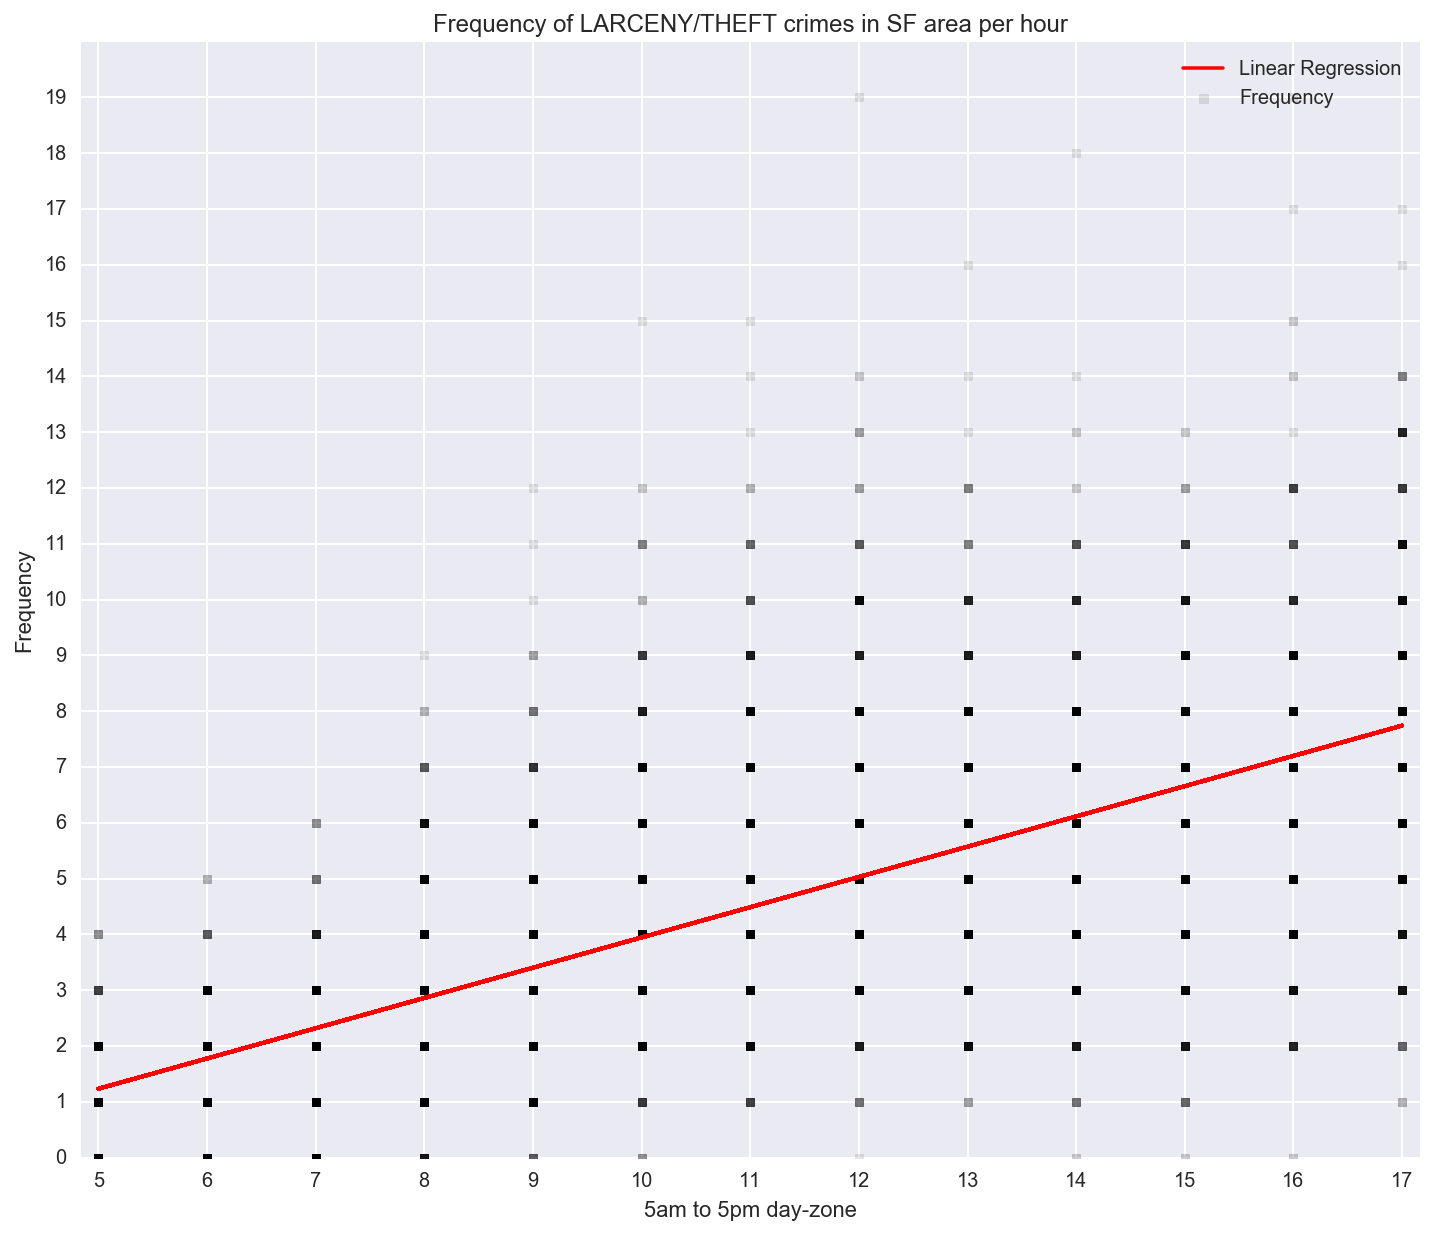

In [26]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12,10))
plt.plot(features,pred,'r-',label='Linear Regression')

#Plotting the scatter plot
# Give the x and y values to the scatterplot and the regression line
plt.scatter(df_2016_merge['Hour'], df_2016_merge['day_hour_count'], color='black',marker='s', alpha=.1,label='Frequency')

# Give labels and titles
plt.ylabel("Frequency")
plt.title("Frequency of LARCENY/THEFT crimes in SF area per hour")
plt.xticks(range(5,18,1))
plt.yticks(range(0,20))
plt.xlabel("5am to 5pm day-zone")

#Set margins
plt.margins(0.01,0)
plt.ylim(0,20)

plt.legend()
plt.show()

Below the result of the **Pearson Correlation Coefficient:**

In [27]:
print 'Pearson Correlation  \t-->\t%.10f' % pearsonr(np.array(df_2016_merge['Hour']),labels)[0]

Pearson Correlation  	-->	0.6548363824


We finally report also $\alpha$ and $\beta$:

In [28]:
beta = lm.coef_[0]
alpha = lm.intercept_
x = PrettyTable()
x.field_names= ['Slope (beta)','Intercept (alpha)']
x.add_row([beta,alpha])
print x

+----------------+-------------------+
|  Slope (beta)  | Intercept (alpha) |
+----------------+-------------------+
| 0.542349726776 |   -1.47971836906  |
+----------------+-------------------+


In light of the above results, the **Linear Regression Classifier** provides nice results but the correlation seems not to be so evident. The model fits our data but the Pearson correlation coefficient doesn't show such a high degree of correlation.

## Assignment 1D: Multiple Regression
*Let's improve the model by incorporating the total amount of crime in the area we're considering.*

*The more general model with $k$ input variables is described as*
$$y_i = \alpha + \beta_1x_{i1} + \ldots + \beta_k x_{ik} + \epsilon_i.$$
*We will be looking at the case when $k=2$, so our model is simply*
$$y_i = \alpha + \beta_1x_{i1} + \beta_2 x_{i2} + \epsilon_i.$$

*In our example, we want to include **both** the **time of day** (as above) and the **total amount of crime** in our model. This means that the $(x_{i1}, x_{i2}, y_{i})$ variables in the model has the following correspondence:*
* $x_{i1}$ *corresponds to time-of-day (input variable)*
* $x_{i2}$ *corresponds to total amount of crime in the area (input variable)*
* $y_i$ *corresponds to the number of LARCENY/THEFT crimes in that bin (output variable)*

*As above, one observation is a $(x_{i1}, x_{i2}, y_{i})$ and you should have 12 for each day in the dataset.*

*In order to make the model useful, you have transform your input variables a bit before fitting:*
* *Firstly, instead of using total crime vs. the crime we're considering, remember to use differences between average total crime and observed crime.*
* *Secondly, remember to rescale your input variables.*

*Explain in your own words the reasoning between the two bullets above.*

*Finally, create and fit the data set using multiple regression. Report $\alpha, \beta_1, \beta_2$.*

Since now we want to count the **total amount of crime** *for each bin*, we proceed as we already did for the linear regression, but we'll add an additional feature. Let's start by preparing our data:

In [29]:
#Starting point
df_2016_merge.head()

,Date,Hour,day_hour_count
0,01/01/2016,5,1.0
1,01/01/2016,6,1.0
2,01/01/2016,7,2.0
3,01/01/2016,8,0.0
4,01/01/2016,9,1.0


Obviously the above DataFrame has the `day_hour_count` values much higher than the ones we found for the Linear Regression, since now we're considering *all the type of crimes* and not only LARCENY/THEFT.

Next, we calculate the **difference in total amount of crime with respect to the average total number of crimes for each time-bin**. We're going to proceed step by step, by first:
* Calculating the **average total number of crimes for each time-bin**: the calculation is simple, we just take all the observations that we previously obtained, group by `Hour`, such that each group contains 366 rows, one for each day of the year; we sum the values of `day_hour_count` for each group and divide by 366: this number will give the expected result:

In [30]:
df_total_crimes_per_hour = df_2016_merge.groupby('Hour')['day_hour_count'].sum().reset_index(name='total_hour_count').sort_values(by='Hour',ascending=True)
df_total_crimes_per_hour.head()

,Hour,total_hour_count
0,5,301.0
1,6,439.0
2,7,617.0
3,8,1090.0
4,9,1294.0


In [31]:
# Merge the previously created dataframe with the one we started from
df_2016_merge = pd.merge(df_2016_merge,
                          df_total_crimes_per_hour,on='Hour',how='left')
df_2016_merge.head()

,Date,Hour,day_hour_count,total_hour_count
0,01/01/2016,5,1.0,301.0
1,01/01/2016,6,1.0,439.0
2,01/01/2016,7,2.0,617.0
3,01/01/2016,8,0.0,1090.0
4,01/01/2016,9,1.0,1294.0


Now that we have the `total_hour_count` for each day-hour bin, we just need to use this temporary column to calculate the **average**, then we can safely drop it since we won't need it anymore:

In [32]:
# Create a column with the average number of crimes for each (day-hour) bin
df_2016_merge['avg_total_hour_count'] = df_2016_merge['total_hour_count']/num_days_per_year

#We can drop the total_hour_count column, since we won't need it anymore
df_2016_merge = df_2016_merge.drop(['total_hour_count'],axis=1)
df_2016_merge.head()

,Date,Hour,day_hour_count,avg_total_hour_count
0,01/01/2016,5,1.0,0.822404
1,01/01/2016,6,1.0,1.199454
2,01/01/2016,7,2.0,1.685792
3,01/01/2016,8,0.0,2.978142
4,01/01/2016,9,1.0,3.535519


Now we have everything to calculate the `difference` between the **daily hour crime count** (which is related to a *specific* date-time!) and the **average hour count** (which, instead, is ***not*** related to a specific date, but only to a *specific hour*!):

In [33]:
#Calculating the difference
df_2016_merge['diff'] = df_2016_merge['avg_total_hour_count']-df_2016_merge['day_hour_count']
df_2016_merge.head()

,Date,Hour,day_hour_count,avg_total_hour_count,diff
0,01/01/2016,5,1.0,0.822404,-0.177596
1,01/01/2016,6,1.0,1.199454,0.199454
2,01/01/2016,7,2.0,1.685792,-0.314208
3,01/01/2016,8,0.0,2.978142,2.978142
4,01/01/2016,9,1.0,3.535519,2.535519


At this point, it's clear the reason of this input variables transformation:
* If on a specific day $T$ at a specific time we observed $X$ crimes and the average number of crimes for *that* hour is $Y$, then we can say that $X$ is $Z=X-Y$ times more (ore less) than we expected (depending on the sign of $Z$).

The normalization of the attributes is performed automatically by the classifier by specifying `normalize = True`. Therefore, we proceed by fitting the classifier and printing the score, $\alpha$ and $\beta$:

In [34]:
#Assign x and y values
features = np.array(df_2016_merge[['Hour','diff']])
labels = np.array(df_2016_merge['day_hour_count'])

# Fit the linear Regression model
mlr = linear_model.LinearRegression(normalize=True)
mlr.fit(features, labels)
pred = mlr.predict(features)
beta1 = mlr.coef_[0]
beta2 = mlr.coef_[1]
alpha = mlr.intercept_

#Printing coefficients and score
x = PrettyTable()
x.field_names = ['Score','Beta_1','Beta_2','Alpha']
x.add_row([mlr.score(features,labels),beta1,beta2,alpha])
print x

+----------------+----------------+--------+----------------+
|     Score      |     Beta_1     | Beta_2 |     Alpha      |
+----------------+----------------+--------+----------------+
| 0.960760249024 | 0.542349726776 |  -1.0  | -1.47971836906 |
+----------------+----------------+--------+----------------+


Finally, we plot the 3D point cloud:

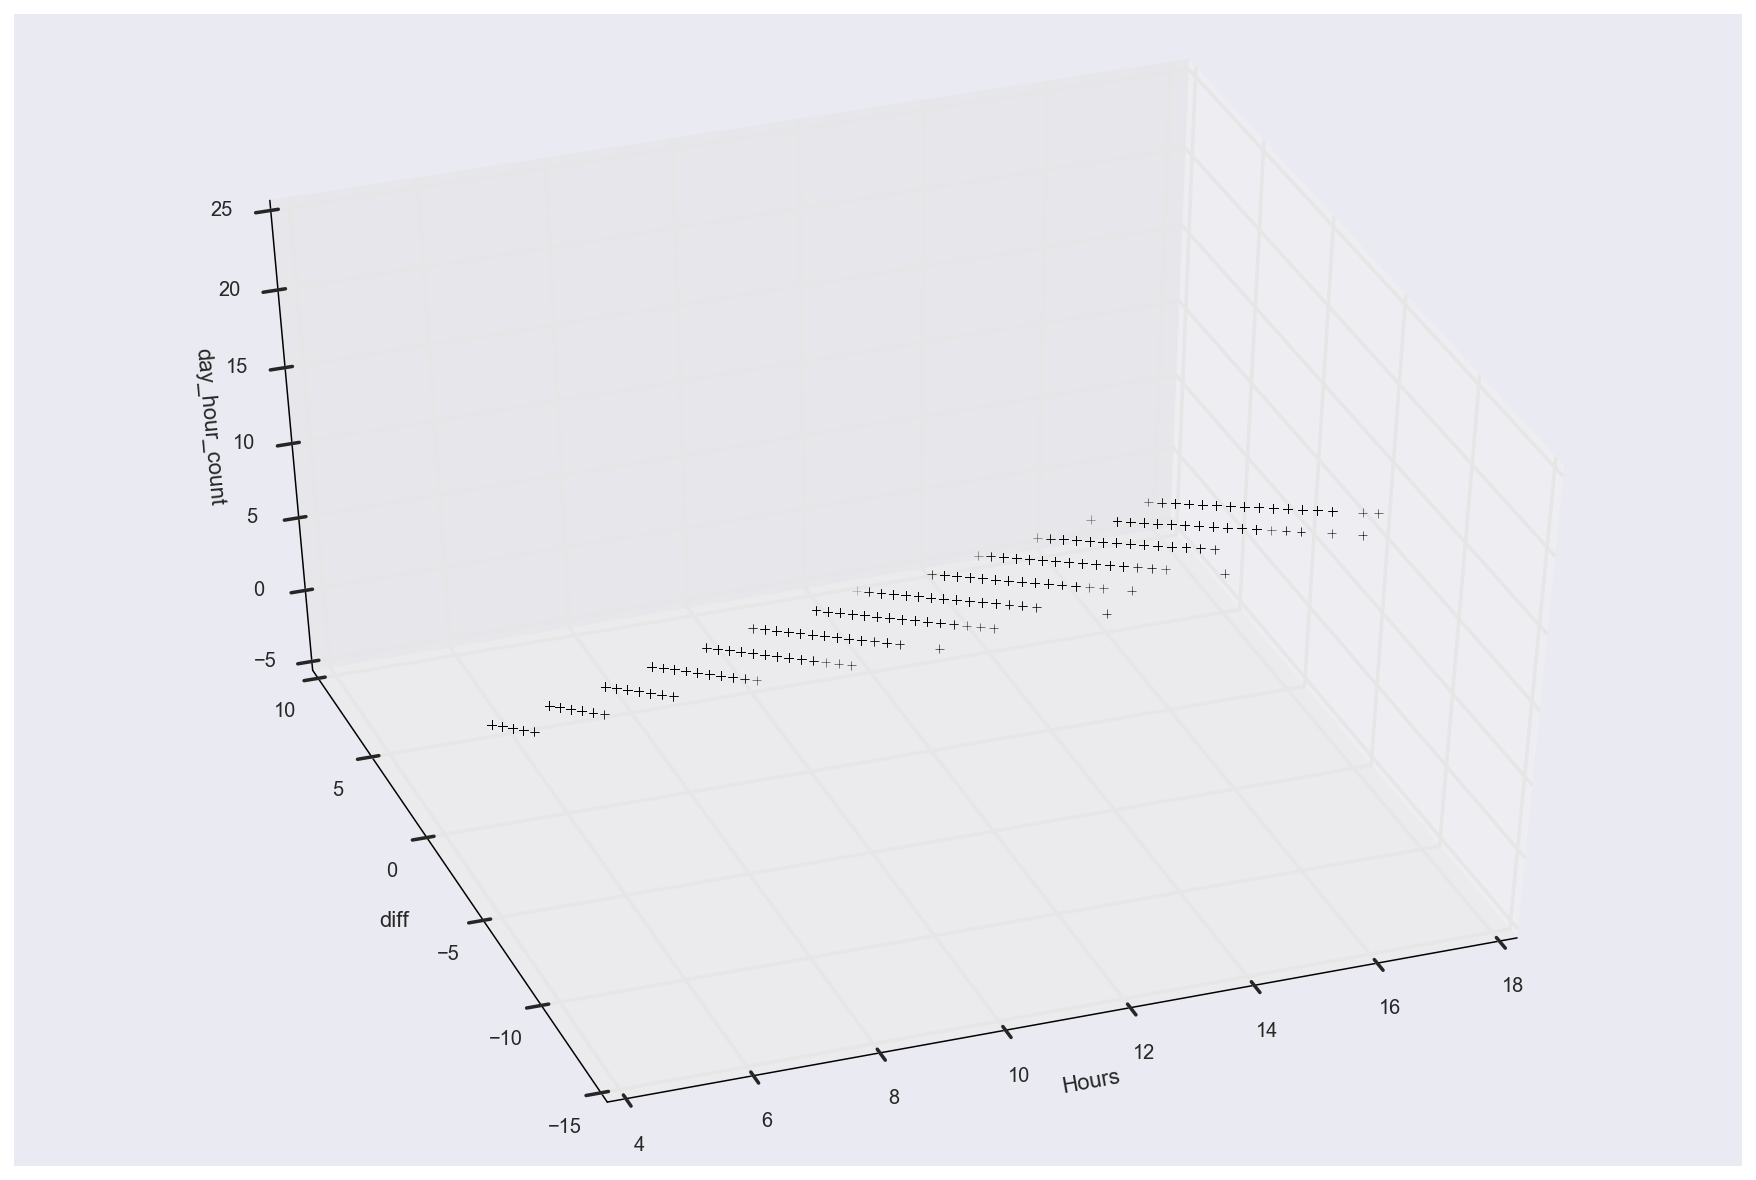

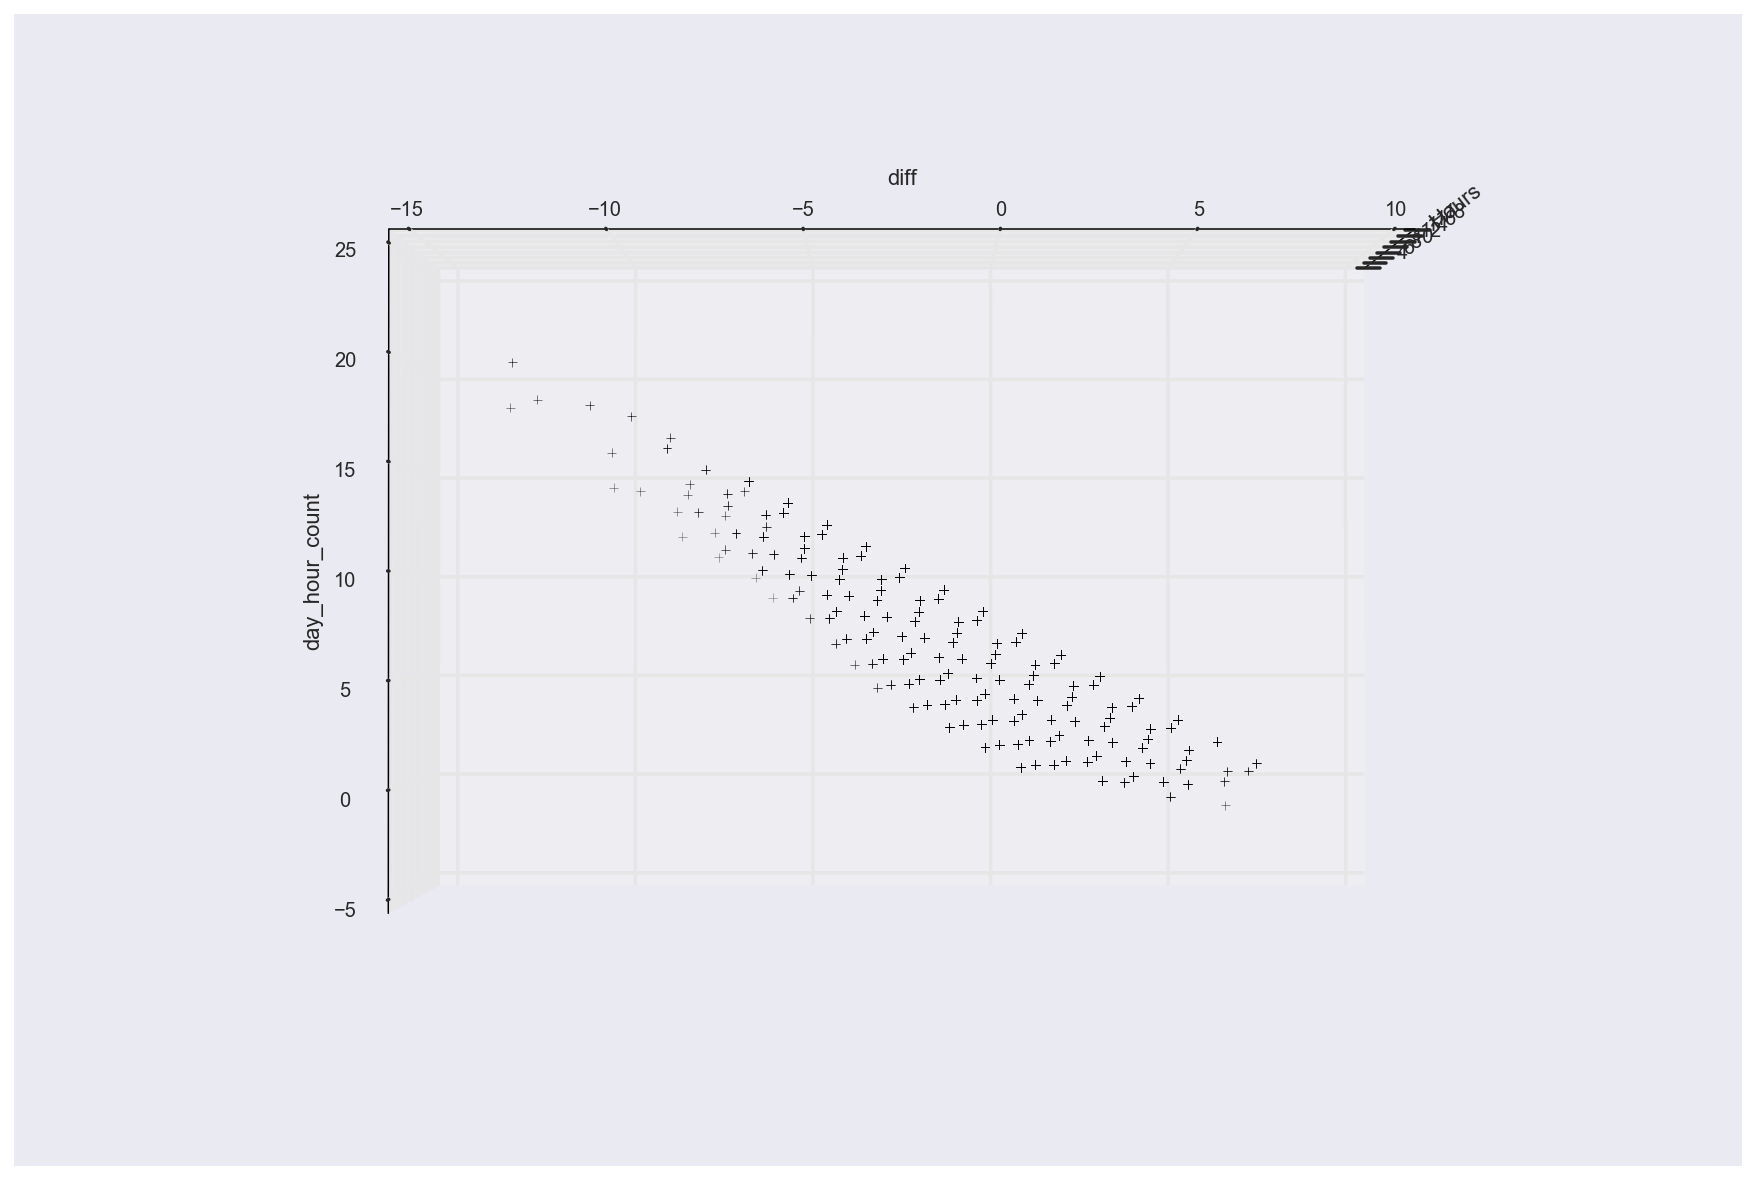

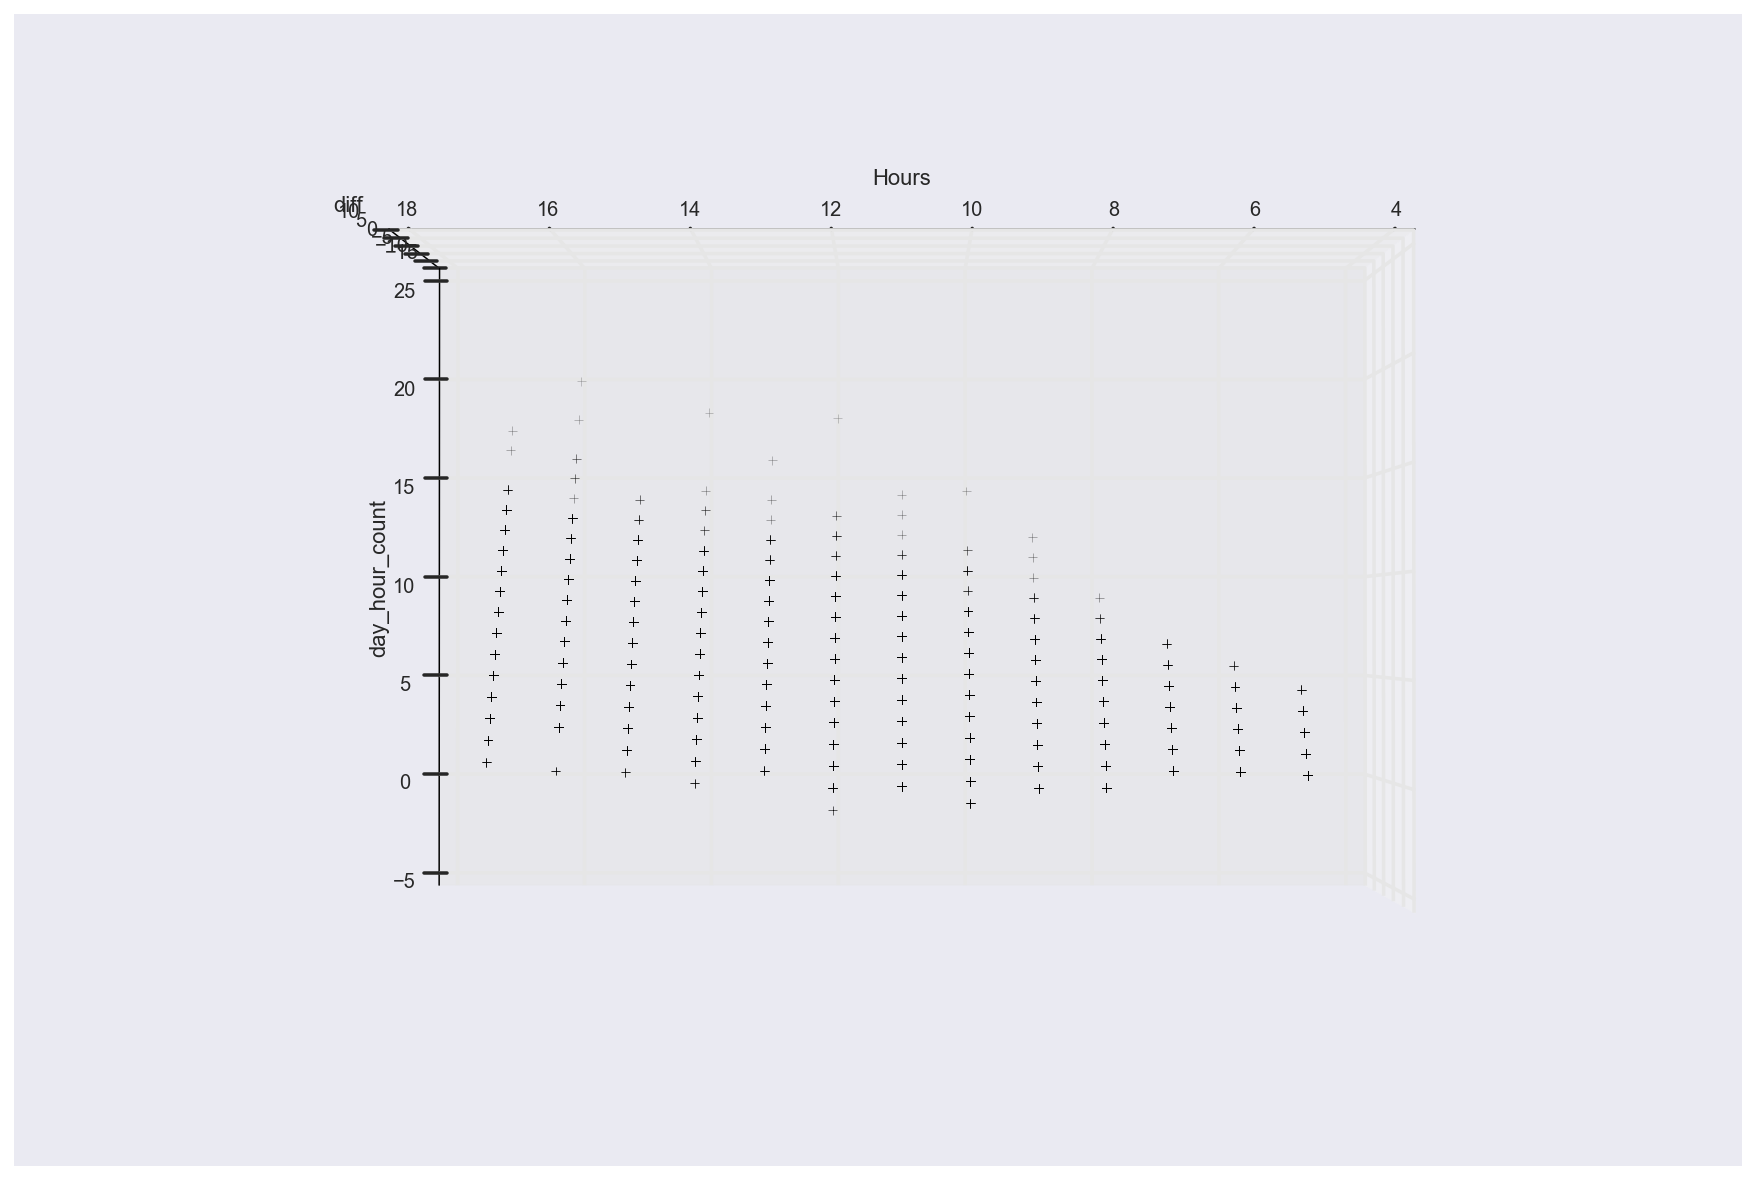

In [35]:
# Plot the 3D figure
def plot_figs(fig_num, elev, azim, features, clf):
    fig = plt.figure(fig_num, figsize=(12, 8))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(features[:, 0], features[:, 1], clf.predict(features), c='k', marker='+')
    
    ax.set_xlabel('Hours')
    ax.set_ylabel('diff')
    ax.set_zlabel('day_hour_count')
    #ax.w_xaxis.set_ticklabels(range(5,18,1))
    #ax.w_yaxis.set_ticklabels([])
    #ax.w_zaxis.set_ticklabels([])

#Generate the three different figures from different views
elev = 43.5
azim = -110
plot_figs(1, elev, azim, features, mlr)

elev = -.5
azim = 0
plot_figs(2, elev, azim, features, mlr)

elev = -.5
azim = 90
plot_figs(3, elev, azim, features, mlr)

plt.show()

The previous output and the 3D plot clearly show that including an additional feature makes the classifier provide better performances, since now we have a score of **96%**.

## Assignment 1E: Simple evaluation of regression models
*In this assignment, compare the accuracy of the simple linear regression with the multiple regression to see what we have gained by increasing the model complexity.*

*We test on two separate weeks of data from 2016. We use the first 7 days (Week A) of January 2016 and first 7 days of June 2016 (Week B).*

*We measure error for a time-bin simply as the absolute difference between predicted crime and observed crime. The error for a week is simply the average error over all time-bins during that week.*

* *Report the performance of Simple & Multiple Regression for Weeks A & B (four results total).*

Basically the first important task for this block of questions is to divide our dataset in **train/test** sets. We'll use as test set the mentioned weeks, and all the other days as training set. In order to extract and filter by year, month and week, we need to define two functions to get the month and the day, given the date.

In [36]:
def get_month(date):
    return int(date.split('/')[1].lstrip('0'))

def get_day(date):
    return int(date.split('/')[0].lstrip('0'))

In [37]:
df_2016_merge['Day'] = df_2016_merge['Date'].apply(lambda x: get_day(x))
df_2016_merge['Month'] = df_2016_merge['Date'].apply(lambda x: get_month(x))

### Linear Regression Model Evaluation
First, we extract from the main DataFrame the test set, represented by Week A and Week B. Then, we properly extract **training/test sets** for features and labels (in common machine learning language, respectively the $X$ matrix and $y$ vector). We need to reshape the arrays and *fit* the classifier. Finally, we use the features test set to predict the labels.

We calculate the error as the absolute difference between the actual value of the daily hour crime count and the predicted value, and for each week we show the result.

In [38]:
week_A = df_2016_merge[(df_2016_merge['Month']==1)&(df_2016_merge['Day']>=1)&(df_2016_merge['Day']<=7)]
week_B = df_2016_merge[(df_2016_merge['Month']==6)&(df_2016_merge['Day']>=1)&(df_2016_merge['Day']<=7)]

def linear_model_evaluation(week,week_name):
    training_set = df_2016_merge.drop(week.index) #Training set = Total - Test Set
    features_training_set = training_set['Hour'] #Extract the single feature for LR
    labels_training_set = training_set['day_hour_count'] #Extract labels/classes
    features_test_set = week['Hour']
    
    #Let's recall features and labels for the linear regression
    features_lr = np.array(features_training_set).reshape(-1,1)
    labels_lr = np.array(labels_training_set)
    lm.fit(features_lr,labels_lr)
    pred = lm.predict(np.array(features_test_set).reshape(-1,1))
    
    df_prediction = week
    df_prediction['lr_pred'] = pred
    df_prediction['lr_error'] = abs(df_prediction['lr_pred']-df_prediction['day_hour_count'])
    average_week_error = df_prediction['lr_error'].mean()
    print '%s Linear Regression Average Error \t-->\t %f' %(week_name,average_week_error)
    
for week,week_name in [(week_A,'Week A'),(week_B,'Week B')]:
    linear_model_evaluation(week,week_name)

Week A Linear Regression Average Error 	-->	 2.041662
Week B Linear Regression Average Error 	-->	 1.824416


The performance of the classifier on Week B are slightly better than Week A's one, but still we need to compare these values with the performances of the multiple regression classifier.

### Multiple Regression Model Evaluation
Not much to explain, we proceed as well as we did for the linear regression above, with the only difference that now the training set will include an additional feature (the ideal $X$ matrix now has two columns). Again, we fit the classifier and predict the labels, calculate the error and report the results.

In [39]:
def multiple_regression_model_evaluation(week,week_name):
    training_set = df_2016_merge.drop(week.index)
    features_training_set = training_set[['Hour','diff']]
    labels_training_set = training_set['day_hour_count']
    features_test_set = week[['Hour','diff']]

    labels_mlr = np.array(labels_training_set)
    mlr.fit(features_training_set,labels_mlr)
    pred = mlr.predict(features_test_set)

    df_prediction = week
    df_prediction['mlr_pred'] = pred
    df_prediction['mlr_error'] = abs(df_prediction['mlr_pred']-df_prediction['day_hour_count'])
    average_week_error = df_prediction['mlr_error'].mean()
    print '%s Multiple Regression Average Error \t-->\t %f' %(week_name,average_week_error)
    
for week,week_name in [(week_A,'Week A'),(week_B,'Week B')]:
    multiple_regression_model_evaluation(week,week_name)

Week A Multiple Regression Average Error 	-->	 0.523047
Week B Multiple Regression Average Error 	-->	 0.522896


* *Comment on your results.*

It's clear that taking in consideration an additional feature (the **total amount of crime**) drove to better performances for the machine learning classification task. The error calculated by the multiple regression model is definitely lower than the linear regression one, and this clearly entitles the former as a better model for predicting the amount of crime at a specific time of the day. 